In [102]:
from abc import ABC
import numpy as np
from typing import Tuple
from matplotlib import pyplot as plt

In [103]:
AngleTimeseries = np.ndarray

class AngleFilter(ABC):
    def run_filter(self, angles: AngleTimeseries) -> AngleTimeseries:
        """Given angles at each timestep, run a filter on the angles and return filters and errors over time.

        Args:
            angle_timeseries (np.ndarray): The angle data over time.

        Returns:
            np.ndarray: The angles.
        """
        pass
        

In [104]:
def graph_filter(angle_filter: AngleFilter, angles: AngleTimeseries, graph_title: str) -> None:
    filtered_angles = angle_filter.run_filter(angles)
    t = range(len(filtered_angles))
    
    fig, a0, a1 = plt.figure(figsize=(12, 6)), plt.subplot(121), plt.subplot(122, projection="polar")
    a0.plot(t, angles, label="Observed angle")
    a0.plot(t, filtered_angles, label="Filtered angle")
    a0.legend()

    a1.plot(filtered_angles, np.ones_like(filtered_angles))
    a1.set_yticklabels([])
    fig.suptitle(graph_title)
    fig.show()
    

In [105]:

class LeakyFilter(AngleFilter):
    def run_filter(self, angles: AngleTimeseries) -> AngleTimeseries:
        N = 10
        filtered_angles = np.zeros_like(angles)
        for i in range(len(angles)):
            if i < N:
                filtered_angles[i] = angles[i]
            else:
                filtered_angles[i] = np.mean(np.concatenate([filtered_angles[i-N+1:i], angles[i:i+1]]))
        return filtered_angles

/tmp/ipykernel_29857/2930779568.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


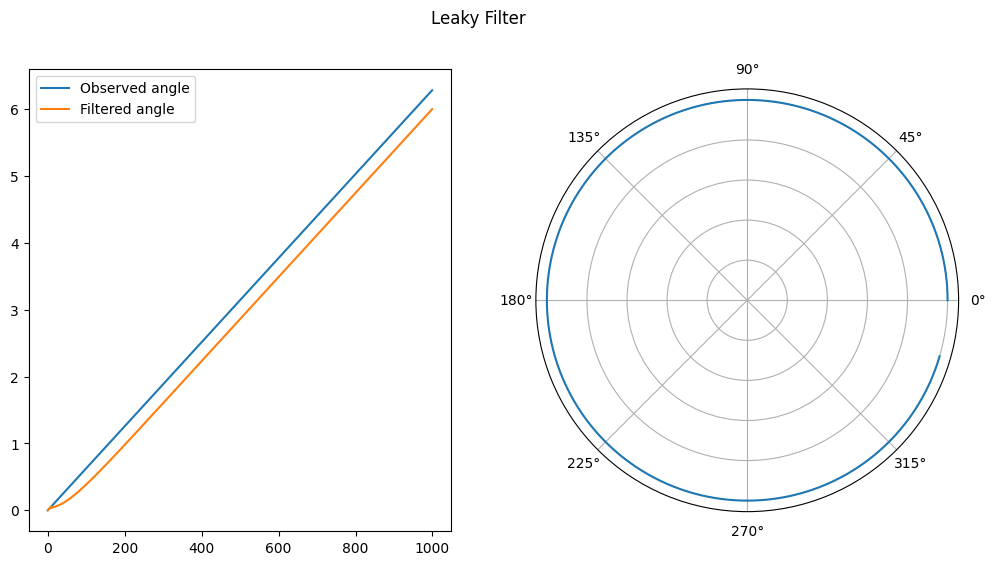

In [106]:
dataset: AngleTimeseries = np.linspace(0, 2*np.pi, 1000)
graph_filter(LeakyFilter(), dataset, "Leaky Filter")